In [23]:
import pandas as pd
import numpy as np
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [24]:
# Load the dataset
def load_dataset(file_path):
    return pd.read_csv(file_path, ',', error_bad_lines=False)

# Tokenization function
def get_tokens(input):
    tokens_by_slash = str(input.encode('utf-8')).split('/') 
    all_tokens = []
    for i in tokens_by_slash:
        tokens = str(i).split('-')
        tokens_by_dot = []
        for j in range(0,len(tokens)):
            temp_tokens = str(tokens[j]).split('.')
            tokens_by_dot = tokens_by_dot + temp_tokens
        all_tokens = all_tokens + tokens + tokens_by_dot
    all_tokens = list(set(all_tokens))
    if 'com' in all_tokens:
        all_tokens.remove('com')
    return all_tokens

# Plotting function for class distribution
def plot_class_distribution(y):
    plt.figure(figsize=(6, 4))
    class_counts = y.value_counts()
    class_labels = class_counts.index
    plt.bar(class_labels, class_counts)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.show()

# Train and evaluate the model
def train_and_evaluate_model(X, y, model_name='logistic_regression'):
    # TF-IDF vectorization
    vectorizer = TfidfVectorizer(tokenizer=get_tokens)
    X = vectorizer.fit_transform(X)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Model initialization
    if model_name == 'logistic_regression':
        model = LogisticRegression()
    elif model_name == 'random_forest':
        model = RandomForestClassifier(n_estimators=150, random_state=24)
    elif model_name == 'svm':
        model = SVC(kernel='linear')
    
    # Model training time calculation
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    
    # Model testing time calculation
    start_time = time.time()
    model.predict(X_test)
    end_time = time.time()
    testing_time = end_time - start_time
    
    # Model evaluation
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    # Confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Precision, recall, F1 score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Classification report
    report = classification_report(y_test, y_pred)
    
    return vectorizer, model, train_accuracy, test_accuracy, cm, precision, recall, f1, report, training_time, testing_time

# Plot confusion matrix
def plot_confusion_matrix(cm, labels, model_name, train_accuracy, test_accuracy, precision, recall, f1):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.text(0.5, -0.15, f'Train Accuracy: {train_accuracy:.2f}\nTest Accuracy: {test_accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}', fontsize=12, ha='center')
    plt.show()

C:\Users\LENOVOV  V14 G3\AppData\Local\Temp\ipykernel_676\134879945.py:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  return pd.read_csv(file_path, ',', error_bad_lines=False)
C:\Users\LENOVOV  V14 G3\AppData\Local\Temp\ipykernel_676\134879945.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  return pd.read_csv(file_path, ',', error_bad_lines=False)


Sampled Dataset and Class Distribution:


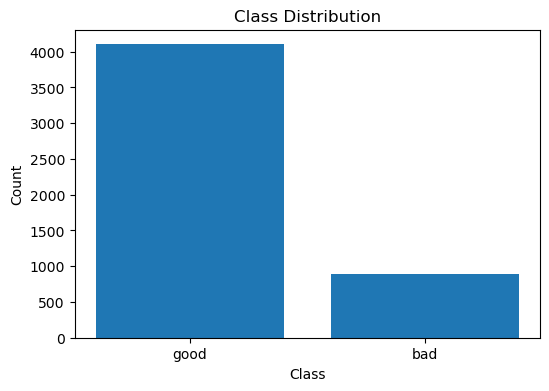


Model Training and Evaluation:


In [25]:
# Load dataset
file_path = 'data/data.csv'
dataset = load_dataset(file_path)

# Section for data sampling and visualization
print("Sampled Dataset and Class Distribution:")
sampled_dataset = dataset.sample(n=5000, random_state=42)  # Increased sampling to 20,000
plot_class_distribution(sampled_dataset['label'])

# Section for training and evaluating models
print("\nModel Training and Evaluation:")
X = sampled_dataset['url']
y = sampled_dataset['label']


Logistic Regression:


D:\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


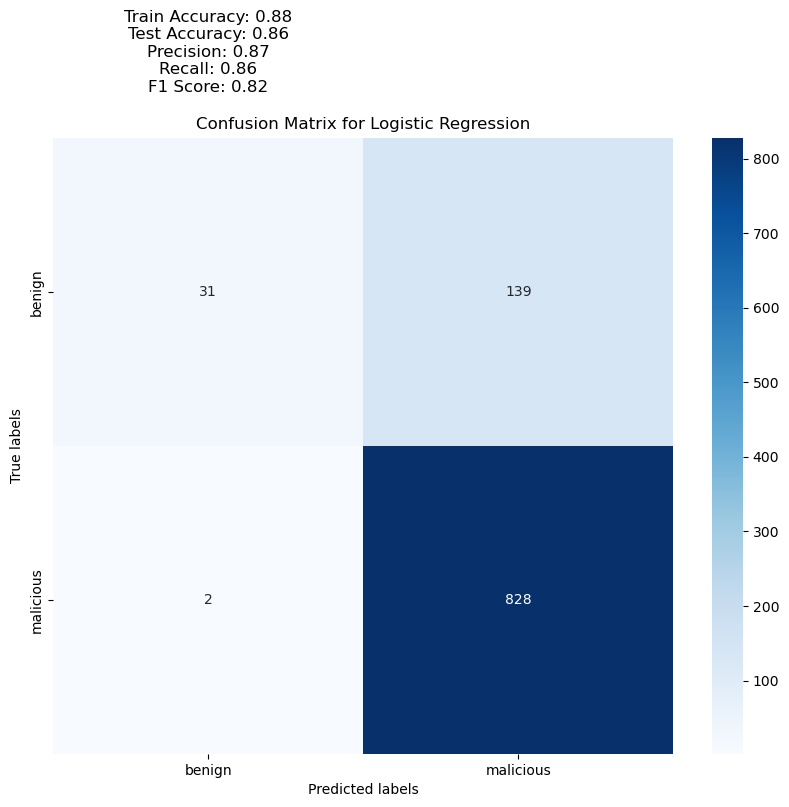

Classification Report:
               precision    recall  f1-score   support

         bad       0.94      0.18      0.31       170
        good       0.86      1.00      0.92       830

    accuracy                           0.86      1000
   macro avg       0.90      0.59      0.61      1000
weighted avg       0.87      0.86      0.82      1000



In [26]:
# Logistic Regression
print("\nLogistic Regression:")
_, _, train_accuracy_lr, test_accuracy_lr, cm_lr, precision_lr, recall_lr, f1_lr, report_lr, training_time_lr, testing_time_lr = train_and_evaluate_model(X, y, 'logistic_regression')
plot_confusion_matrix(cm_lr, ['benign', 'malicious'], 'Logistic Regression', train_accuracy_lr, test_accuracy_lr, precision_lr, recall_lr, f1_lr)
print("Classification Report:\n", report_lr)


Random Forest:


D:\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


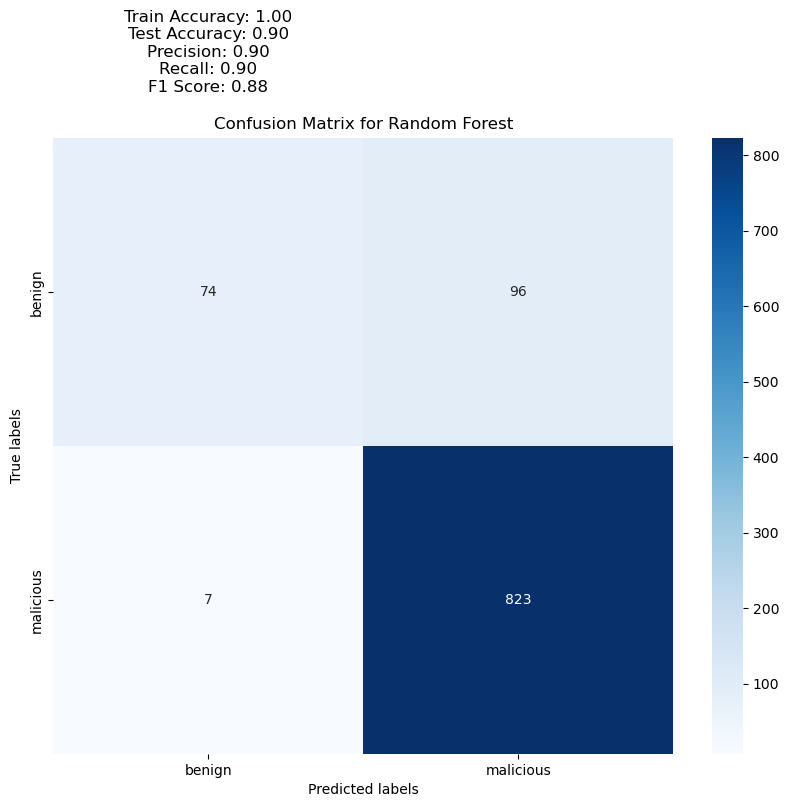

Classification Report:
               precision    recall  f1-score   support

         bad       0.91      0.44      0.59       170
        good       0.90      0.99      0.94       830

    accuracy                           0.90      1000
   macro avg       0.90      0.71      0.77      1000
weighted avg       0.90      0.90      0.88      1000



In [27]:
 # Random Forest
print("\nRandom Forest:")
_, _, train_accuracy_rf, test_accuracy_rf, cm_rf, precision_rf, recall_rf, f1_rf, report_rf, training_time_rf, testing_time_rf = train_and_evaluate_model(X, y, 'random_forest')
plot_confusion_matrix(cm_rf, ['benign', 'malicious'], 'Random Forest', train_accuracy_rf, test_accuracy_rf, precision_rf, recall_rf, f1_rf)
print("Classification Report:\n", report_rf)


Support Vector Machine (SVM):


D:\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


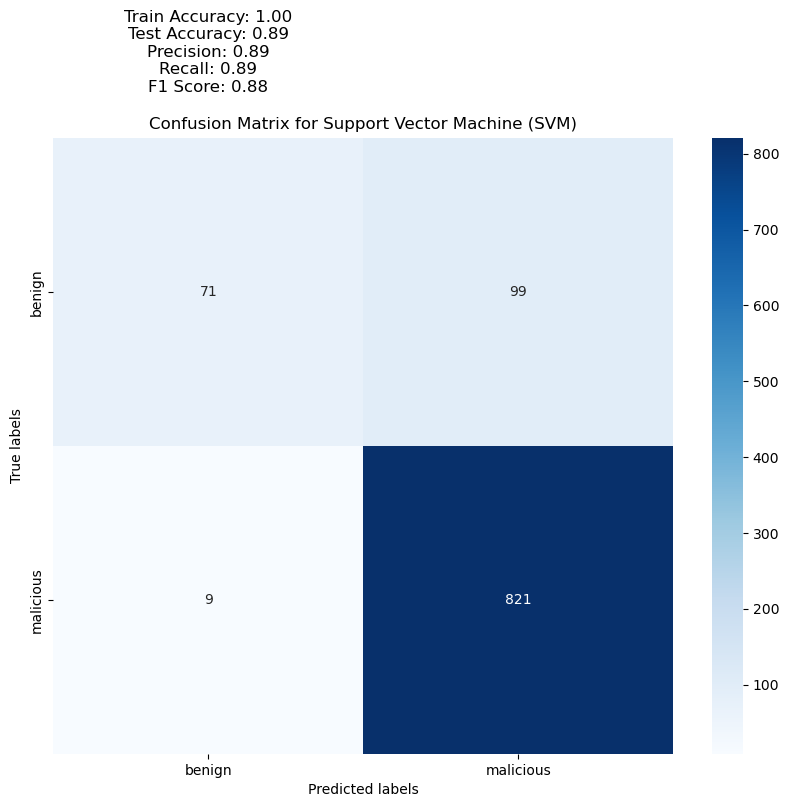

Classification Report:
               precision    recall  f1-score   support

         bad       0.89      0.42      0.57       170
        good       0.89      0.99      0.94       830

    accuracy                           0.89      1000
   macro avg       0.89      0.70      0.75      1000
weighted avg       0.89      0.89      0.88      1000



In [28]:
# SVM
print("\nSupport Vector Machine (SVM):")
_, _, train_accuracy_svm, test_accuracy_svm, cm_svm, precision_svm, recall_svm, f1_svm, report_svm, training_time_svm, testing_time_svm = train_and_evaluate_model(X, y, 'svm')
plot_confusion_matrix(cm_svm, ['benign', 'malicious'], 'Support Vector Machine (SVM)', train_accuracy_svm, test_accuracy_svm, precision_svm, recall_svm, f1_svm)
print("Classification Report:\n", report_svm)

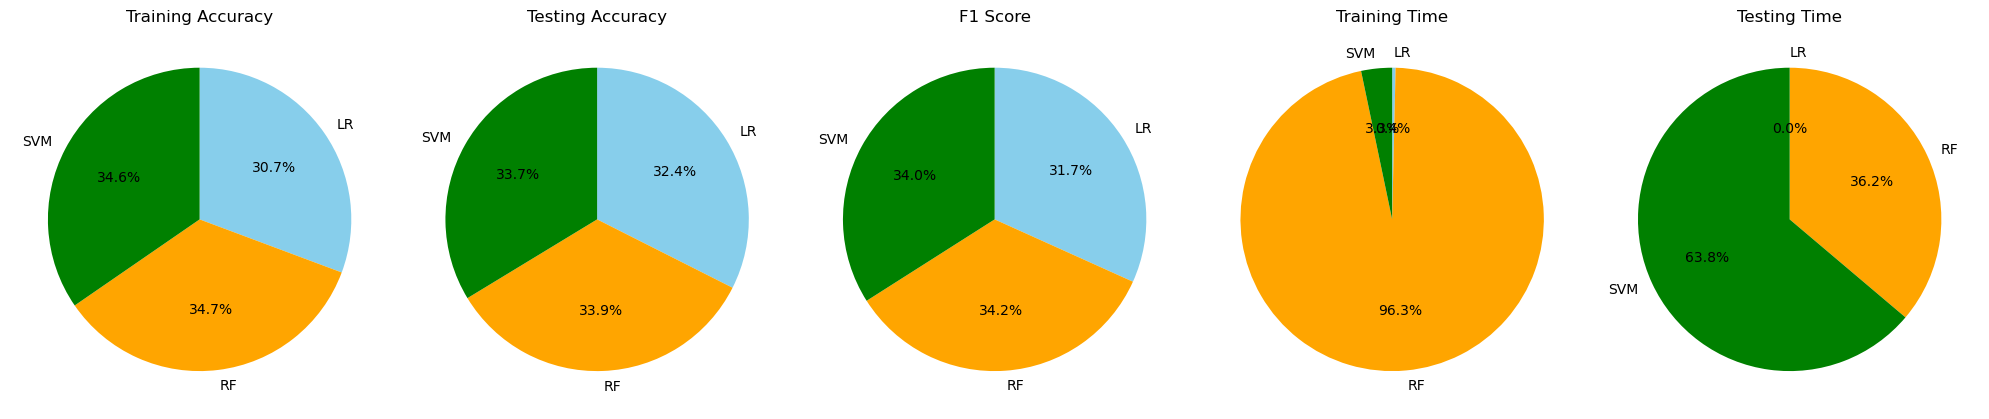

In [29]:
# Plotting training accuracy, testing accuracy, F1 score, training time, and testing time for all models
models = ['LR', 'RF', 'SVM']
train_accuracies = [train_accuracy_lr, train_accuracy_rf, train_accuracy_svm]
test_accuracies = [test_accuracy_lr, test_accuracy_rf, test_accuracy_svm]
f1_scores = [f1_lr, f1_rf, f1_svm]
training_times = [training_time_lr, training_time_rf, training_time_svm]
testing_times = [testing_time_lr, testing_time_rf, testing_time_svm]

fig, axs = plt.subplots(1, 5, figsize=(20, 8))

metrics = [train_accuracies, test_accuracies, f1_scores, training_times, testing_times]
metrics_labels = ['Training Accuracy', 'Testing Accuracy', 'F1 Score', 'Training Time', 'Testing Time']
colors = ['skyblue', 'orange', 'green', 'purple', 'red']

for i in range(5):
    axs[i].pie(metrics[i], labels=models, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False)
    axs[i].set_title(metrics_labels[i])

plt.tight_layout()
plt.show()
